In [2]:
import wdwarfdate


In [56]:
import numpy as np

teffs = np.array([15896.513017602284])
loggs = np.array([8.068090])

teffs_err = np.array([[175], [175]])
loggs_err = np.array([[0.020257293326959136], [0.030854296059203534]])



In [57]:
WD = wdwarfdate.WhiteDwarf(teffs,teffs_err,loggs,loggs_err,
                           model_wd='DA',feh='p0.00',vvcrit='0.0',
                           model_ifmr = 'Cummings_2018_MIST', 
                           high_perc = 84, low_perc = 16,
                           datatype='Gyr', save_plots=True, 
                           display_plots=True)

Running Teff = 15896.51 +/- [175] K, logg = 8.07 +/- [0.02]
Grid limits used to evaluate the posterior: mi = 0.95-3.01 Msun, log10_tcool = 8.21-8.34


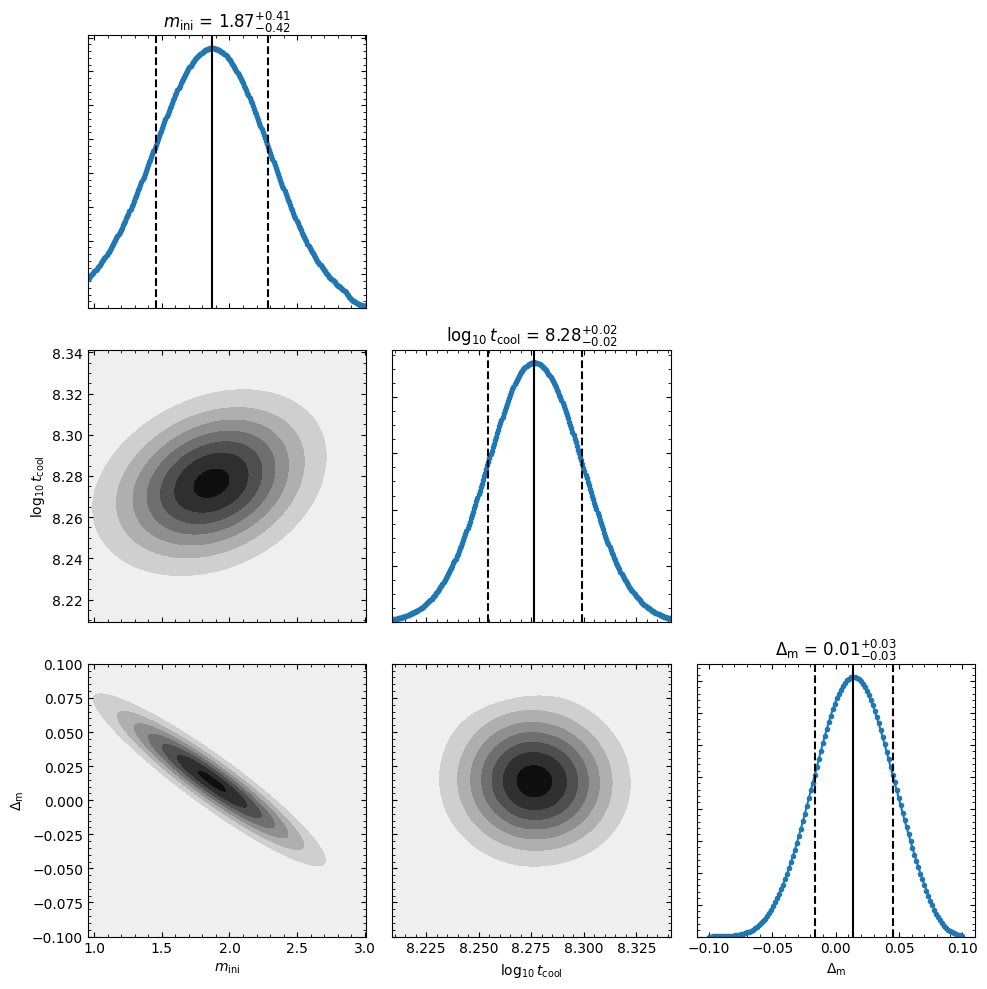

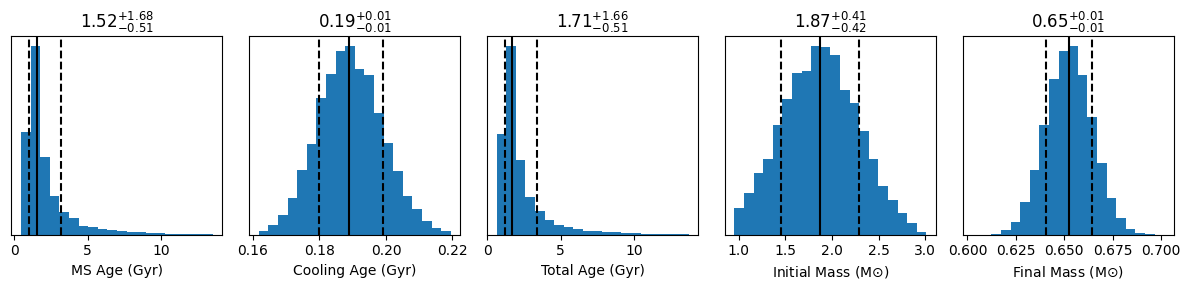

In [58]:
WD.calc_wd_age()

In [40]:
WD.results

ms_age_median,ms_age_err_low,ms_age_err_high,cooling_age_median,cooling_age_err_low,cooling_age_err_high,total_age_median,total_age_err_low,total_age_err_high,initial_mass_median,initial_mass_err_low,initial_mass_err_high,final_mass_median,final_mass_err_low,final_mass_err_high
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.5636338942144304,0.1249414036580026,0.2614581461528206,0.2387670916219405,0.010744911961917208,0.011251236097758993,0.802008004895611,0.12068693572194389,0.2588462474727312,2.7983114186851212,0.3431695501730103,0.25212456747404843,0.7334207095877723,0.012500402255946508,0.012815181102362239


In [1]:
print(1.68-0.1414)

1.5386


In [9]:
import wdwarfdate
import numpy as np
import time
import matplotlib.pyplot as plt

In [8]:
teffs = np.array([15896.533017602284])
loggs = np.array([7.84527886317635])

teffs_err = np.array([[175], [175]])
loggs_err = np.array([[0.020257293326959136], [0.030854296059203534]])

In [9]:
start = time.time()
WD = wdwarfdate.WhiteDwarf(teffs,teffs_err,loggs,loggs_err,
                           model_wd='DA',feh='p0.00',vvcrit='0.0',
                           model_ifmr = 'Cummings_2018_MIST',
                           high_perc = 84, low_perc = 16,
                           datatype='yr',
                           save_plots=False, display_plots=False)
WD.calc_wd_age()
end = time.time()
print(f'{np.round(end - start,2)}s')

Running Teff = 15896.53 +/- [175] K, logg = 7.85 +/- [0.02]
Grid limits used to evaluate the posterior: mi = 0.95-1.69 Msun, log10_tcool = 8.03-8.18
5.27s


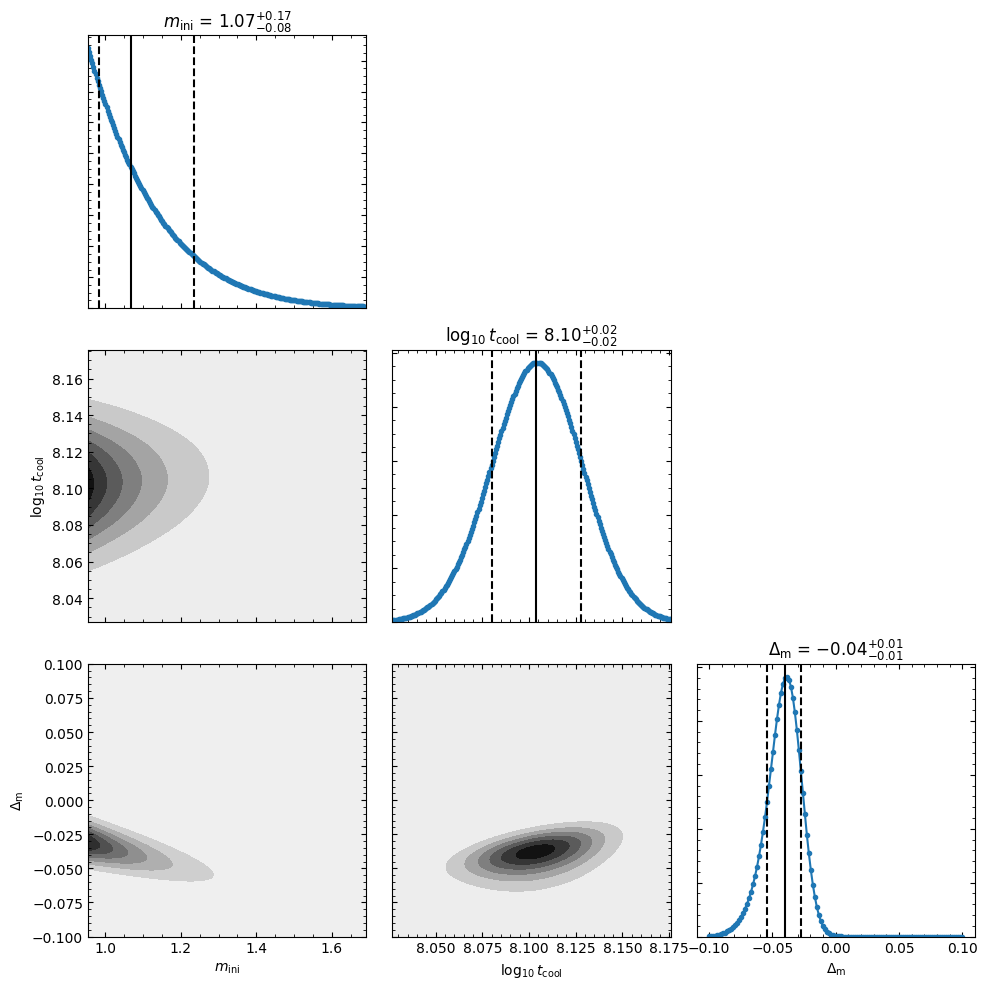

In [10]:
params_label = [r'$m_{\rm ini}$', r'$\log _{10} t_{\rm cool}$',
                        r'$\Delta _{\rm m}$']
res = [WD.mi_median, WD.log10_tcool_median, WD.delta_m_median]
res_err_low = [WD.mi_err_low, WD.log10_tcool_err_low, WD.delta_m_err_low]
res_err_high = [WD.mi_err_high, WD.log10_tcool_err_high, WD.delta_m_err_high]
title = r"${{{0:.2f}}}_{{-{1:.2f}}}^{{+{2:.2f}}}$"
f, axs = plt.subplots(3, 3, figsize=(10, 10), sharex='col')

for i in range(3):
    for j in range(3):
        if i == j:
            # Diagonal plots
            axs[i, j].plot(WD.params[i], WD.params_prob[i], '.-')
            axs[i, j].axvline(x=res[i], color='k')
            axs[i, j].axvline(x=res[i] - res_err_low[i], color='k', linestyle='--')
            axs[i, j].axvline(x=res[i] + res_err_high[i], color='k', linestyle='--')
            axs[i, j].set_yticklabels([])
            axs[i, j].set_ylim(0,)
            if any(np.array([np.round(res[i], 2), np.round(res_err_low[i], 2),
                             np.round(res_err_high[i], 2)]) == 0):
                dec_num = 2
                while any(np.array([np.round(res[i], dec_num),
                                    np.round(res_err_low[i], dec_num),
                                    np.round(res_err_high[i], dec_num)]) == 0):
                    dec_num += 1
                    title2 = r"${{{0:." + str(dec_num) + "f}}}_{{-{1:." + str(dec_num) + "f}}}^{{+{2:." + str(
                        dec_num) + "f}}}$"
                    axs[i, j].set_title(params_label[i] + ' = ' + title2.format(np.round(res[i], dec_num),
                                                                                np.round(res_err_low[i],
                                                                                         dec_num),
                                                                                np.round(res_err_high[i],
                                                                                         dec_num)))
            else:
                axs[i, j].set_title(params_label[i] + ' = ' + title.format(np.round(res[i], 2),
                                                                           np.round(res_err_low[i], 2),
                                                                           np.round(res_err_high[i], 2)))
        elif i > j:
            # Out of diagonal plots
            options = np.array([0, 1, 2])
            mask = np.array([x not in [i, j] for x in options])
            axis_sum = options[mask][0]
            axs[i, j].contourf(WD.params[j], WD.params[i], np.nansum(WD.posterior, axis=(axis_sum)).transpose(),
                               cmap='gist_yarg')
            if j == 1:
                axs[i, j].set_yticklabels([])
        else:
            f.delaxes(axs[i, j])

        if i == 2:
            axs[i, j].set_xlabel(params_label[j])

        if j == 0 and i != 0:
            axs[i, j].set_ylabel(params_label[i])

        axs[i, j].tick_params('both', direction='in', top=True, right=True)
        axs[i, j].minorticks_on()
        axs[i, j].tick_params('both', which='minor', direction='in', top=True, right=True)
plt.tight_layout()
plt.show()


In [17]:
results = wdwarfdate.calc_percentiles(10**WD.log10_tms_sample/1e9,
                                      10**WD.log10_tcool_sample/1e9,
                                      10**WD.log10_ttot_sample/1e9,
                                      WD.mi_sample, WD.mf_sample,
                                      WD.high_perc, WD.low_perc)

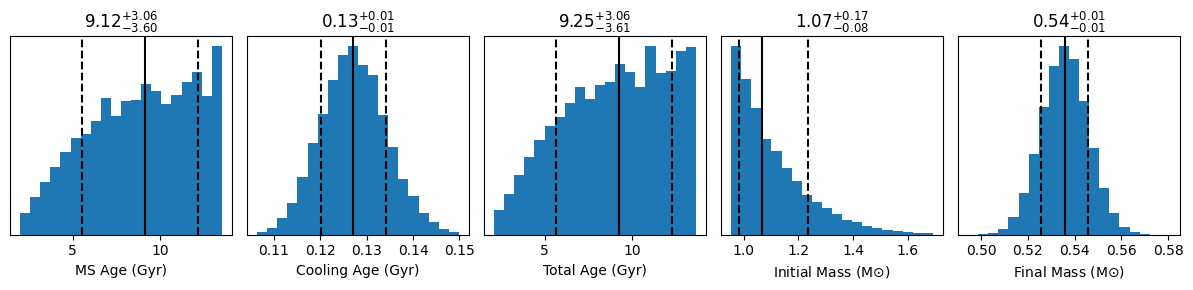

In [18]:
title = r"${{{0:.2f}}}_{{-{1:.2f}}}^{{+{2:.2f}}}$"
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(12, 3))

axs = [ax1, ax2, ax3, ax4, ax5]

labels = ['MS Age (Gyr)', 'Cooling Age (Gyr)', 'Total Age (Gyr)',
          r'Initial Mass (M$\odot$)', r'Final Mass (M$\odot$)']

distributions = [10**WD.log10_tms_sample/1e9, 10**WD.log10_tcool_sample/1e9,
                 10**WD.log10_ttot_sample/1e9, WD.mi_sample, WD.mf_sample]

for ax, label, dist, i in zip(axs, labels, distributions, np.arange(0, 15, 3)):
    ax.hist(dist[~np.isnan(dist)], bins=20)
    ax.axvline(x=results[i], color='k')
    ax.axvline(x=results[i] - results[i+1], color='k', linestyle='--')
    ax.axvline(x=results[i] + results[i+2], color='k', linestyle='--')
    ax.set_xlabel(label)
    ax.yaxis.set_visible(False)
    ax.set_title(title.format(np.round(results[i], 2),
                              np.round(results[i+1], 2),
                              np.round(results[i+2], 2)))
plt.tight_layout()
plt.show()


In [ ]:
import astropy.table
